In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [8]:
#clean_data = pd.read_csv("src\csv\clean_data.csv")
clean_data = pd.read_csv("clean_data.csv")

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Tworzenie kolumny docelowej
def categorize_fire(row):
    if row['Civilian_Casualties'] > 0 and row['Estimated_Dollar_Loss'] > 0:
        return 'Ofiary i straty materialne'
    elif row['Civilian_Casualties'] == 0 and row['Estimated_Dollar_Loss'] > 0:
        return 'Brak ofiar, straty materialne'
    elif row['Civilian_Casualties'] > 0 and row['Estimated_Dollar_Loss'] == 0:
        return 'Ofiary, brak strat materialnych'
    else:
        return 'Brak ofiar i strat materialnych'

# Dodanie kolumny docelowej
clean_data['Outcome'] = clean_data.apply(categorize_fire, axis=1)
# Tutaj przetwarzamy dane kategoryczne, zakładając, że wszystkie obiekty mają typ 'object'

label_encoder = LabelEncoder()
for column in clean_data.columns:
    if clean_data[column].dtype == 'object':
        clean_data[column] = label_encoder.fit_transform(clean_data[column])

# Podział danych na zbiór cech (X) i zmienną docelową (y)
X = clean_data.drop(['Outcome'], axis=1)  # Usunięcie kolumny docelowej
X.fillna(method='ffill', inplace=True)
y = clean_data['Outcome']

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Oversampling mniejszościowej klasy
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Inicjalizacja i dopasowanie modelu drzewa decyzyjnego
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Przewidywanie na zbiorze testowym
predictions = model.predict(X_test)

# Ocena modelu
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
print(X_train, y_train)


C:\Users\stemp\AppData\Local\Temp\ipykernel_21616\3009128937.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       422
           1       1.00      1.00      1.00      2676
           2       1.00      1.00      1.00       253
           3       1.00      1.00      1.00        14

    accuracy                           1.00      3365
   macro avg       1.00      1.00      1.00      3365
weighted avg       1.00      1.00      1.00      3365

       Civilian_Casualties  Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
0                        0                         0                   3000   
1                        0                         0                      0   
2                        0                         0                  25000   
3                        0                         0                 100000   
4                        1                         1                   1000   
...                    ...                       ... 

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


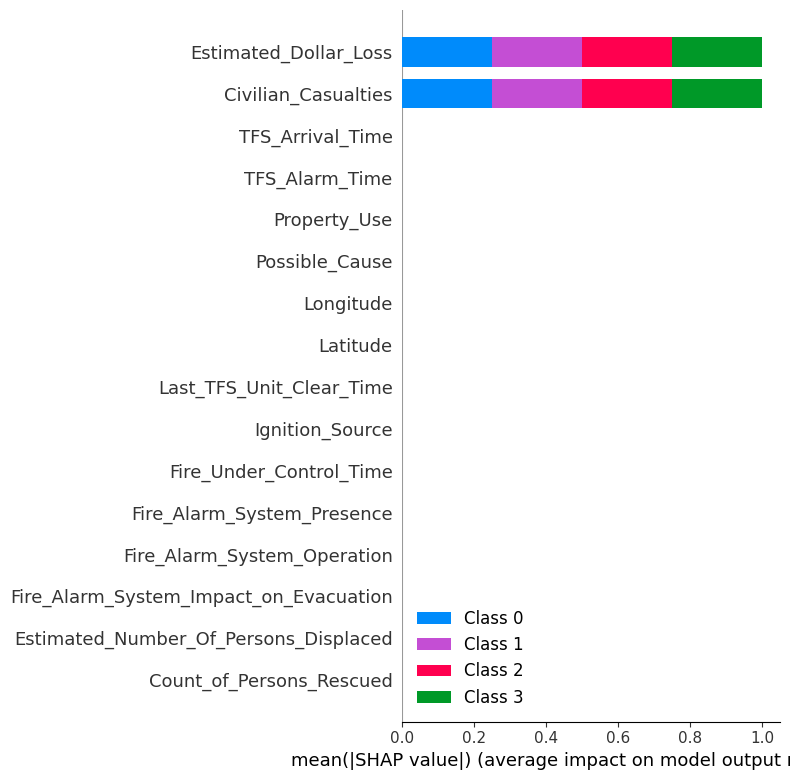

In [10]:
import shap

# Inicjalizacja explainera
explainer = shap.TreeExplainer(model)

# Obliczanie wartości SHAP dla zbioru treningowego
shap_values = explainer.shap_values(X_train)

# Wizualizacja ważności cech
shap.summary_plot(shap_values, X_train, plot_type="bar")
